## Comparison between the FFT mode and the non-unifrom FFT mode for the pseudo Wigner distribution 

In [2]:
using Winston;
using Color;
import DSP
using PyPlot

In [3]:
include("../juwvid.jl")

juwvid

In [4]:
## sin FM 
nsample=4096;
xs,ys,iws,ynorms=sampledata.genfm(nsample,2*pi,2*pi/365,1.0,365.0);
z=DSP.Util.hilbert(ys);

### the Pseudo Wigner Ville distribution with FFT

In [14]:
tfrpf=cohenclass.tfrpwv(z,NaN,NaN,NaN,NaN,NaN,0);

Single pseudo Wigner Ville
Use fft.


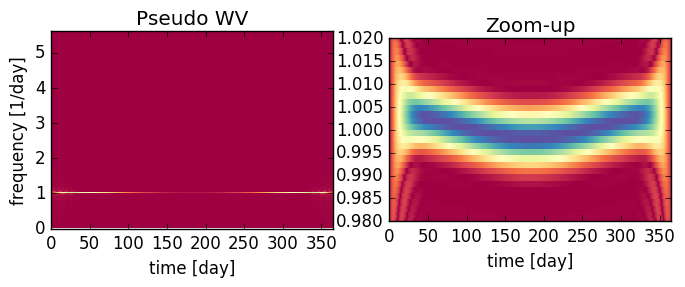

(0.98,1.02)

In [19]:
fig=PyPlot.figure()
ax = fig[:add_subplot](1,2,1)
a=juwplot.tfrshow(abs(tfrpf),xs[2]-xs[1],xs[1],xs[end],NaN,NaN,0.7,"Spectral")
PyPlot.xlabel("time [day]")
PyPlot.ylabel("frequency [1/day]")
PyPlot.title("Pseudo WV")
ax = fig[:add_subplot](1,2,2)
a=juwplot.tfrshow(abs(tfrpf),xs[2]-xs[1],xs[1],xs[end],NaN,NaN,0.7*130,"Spectral")
PyPlot.xlabel("time [day]")
PyPlot.title("Zoom-up")
PyPlot.ylim(0.98,1.02)

In [13]:
# extracting the IF
indf=extif.maxif(abs(tfrpf));
dx=xs[2]-xs[1]
fx=juwutils.index_to_frequency(indf,NaN,dx,nsample);

In [20]:
# We extract frequency indices of 0.98 and 1.02 [1/day] because we want to know the signal around 1. 
juwutils.frequency_to_index([0.98,1.02], xs[2]-xs[1], nsample)

2-element Array{Int64,1}:
 717
 746

### the Pseudo Wigner-Ville with NUFFT

In [24]:
nnufft=1024
fin=collect(linspace(717,746,nnufft));
tfrpfn=cohenclass.tfrpwv(z,NaN,NaN,fin,NaN,NaN,0);

Single pseudo Wigner Ville
Use nufft.


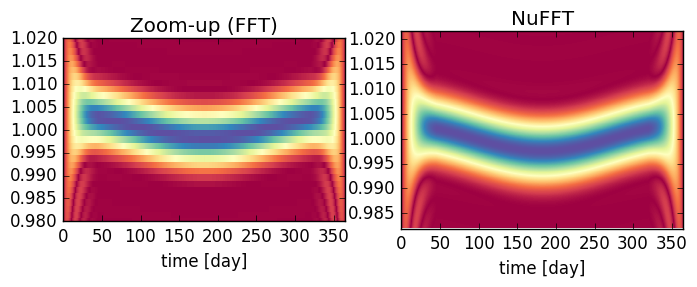

PyObject <matplotlib.text.Text object at 0x31dc9e8d0>

In [48]:
fig=PyPlot.figure()
ax = fig[:add_subplot](1,2,1)
a=juwplot.tfrshow(abs(tfrpf),xs[2]-xs[1],xs[1],xs[end],NaN,NaN,0.7*130,"Spectral")
PyPlot.xlabel("time [day]")
PyPlot.title("Zoom-up (FFT)")
PyPlot.ylim(0.98,1.02)
ax = fig[:add_subplot](1,2,2)
a=juwplot.tfrshow(abs(tfrpfn),xs[2]-xs[1],xs[1],xs[end],fin[1],fin[end],0.7,"Spectral")
PyPlot.xlabel("time [day]")
PyPlot.title("NuFFT")

In [45]:
indfn=extif.maxif(abs(tfrpfn));
fn=juwutils.index_to_frequency(indfn, fin,xs[2]-xs[1],nsample);

### comparison of the extracted IFs
- the red curve corresponds to the input IF, gray is the pseudo Wigner-Ville with FFT, and blue is the pseudo Wigner-Ville with NUFFT.  
- The NUFFT is necessary. 
- The pseudo Wigner-Ville with NUFFT provides us the IF with the sufficient resolution.

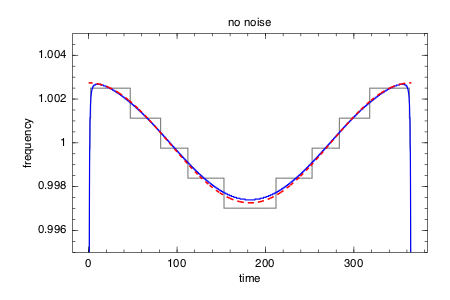

In [46]:
p = FramedPlot(
title="no noise",
xlabel="time",
ylabel="frequency",
yrange=(0.995,1.005)
);
add(p, Curve(xs,fx, color="gray",width=3))
add(p, Curve(xs,fn, color="blue",width=3))
add(p, Curve(xs,iws/(2*pi), color="red", kind="dash",width=4))

### Thinning out time grids for reducing computational time 

In [47]:
# using one in 20 time grids 
nthin=20
itc=collect(1:nthin:nsample);
tfrpfi=cohenclass.tfrpwv(z,NaN,NaN,fin,itc,NaN,0);

Single pseudo Wigner Ville
Use nufft.


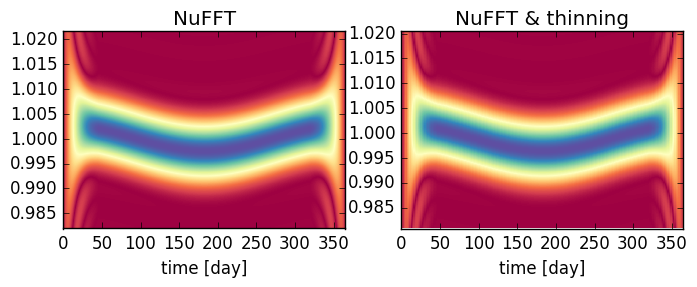

PyObject <matplotlib.text.Text object at 0x31d5d6210>

In [49]:
fig=PyPlot.figure()
ax = fig[:add_subplot](1,2,1)
a=juwplot.tfrshow(abs(tfrpfn),xs[2]-xs[1],xs[1],xs[end],fin[1],fin[end],0.7,"Spectral")
PyPlot.xlabel("time [day]")
PyPlot.title("NuFFT")
ax = fig[:add_subplot](1,2,2)
a=juwplot.tfrshow(abs(tfrpfi),(xs[2]-xs[1])*nthin,xs[1],xs[end],fin[1],fin[end],0.7,"Spectral")
PyPlot.xlabel("time [day]")
PyPlot.title("NuFFT & thinning")

In [ ]:
### this technique is useful for large dataset